# Stock Volatility and Google Trends

In this activity, you’ll analyze time series data about Apple to identify any correlations among Google Trends, the stock price returns, and the stock volatility.

Instructions

Do a time series analysis of Apple from October 2015 to October 2020. Evaluate if any predictable relationship exists among the Google Trends data, Apple’s stock price, and Apple’s volatility and return metrics. To do all of that, complete the steps in the following two sections.

#### Set Up and Visualize the Data

1. Read the time series data into two Pandas DataFrames, `df_stock` and `df_trends`. Set the “date” column as the index for each of these DataFrames.

2. Concatenate the `df_stock` DataFrame to the `df_trends` DataFrame, creating a single DataFrame named `df_apple`.

3. Create a plot of the concatenated DataFrame by using hvPlot to visually analyze any trends and correlations. Do you observe any seasonal patterns?

    > **Hint** You might find it useful to refer to the [Apple Events page](https://www.apple.com/apple-events/) and the [Timeline of Apple Inc. products](https://en.wikipedia.org/wiki/Timeline_of_Apple_Inc._products) to spotlight moments over time that could have triggered a particular pattern.

#### Build Time Trends

1. Note that on September 10, 2019, Apple organized an event where it presented the new iPhone 11 family, the Apple Watch Series 5, and a new iPad. This event gained worldwide attention.

2. Closely examine the data from March 1, 2019 to January 31, 2020.

3. Create a plot by using hvPlot, and then identify whether both time series indicate a common trend that might correspond to this narrative.

4. Before seeking any correlations between these time series, add columns to the `df_apple` DataFrame to analyze the impact of the Google Trends data on the weekly returns and stock volatility, as follows:

    1. Use the Pandas `shift` function to add a new column that lags the Google Trends data by one period.

        > **Hint** Google Trends data is reported every week on Sunday, so you have a weekly period in this time series.

    2. Use the Pandas `pct_change` function to add a new column that has the weekly price returns.

    3. Compute the rolling stock volatility for Apple by using the following Pandas method:
        `df_apple["weekly_volatility"] = df_apple["close"].pct_change().rolling(window=4).std()`

5. Use the Pandas `corr` function to compute the correlations among the lagged Google Trends data, the price returns, and the stock volatility. Does any predictable relationship exist?


References

- [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

- [Pandas rolling function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)

- [Pandas std function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)

- [Pandas corr function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)


In [20]:
# Import the required libraries and dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
from path import Path

%matplotlib inline

## Set up and Visualize the Data

### Step 1: Read the time series data into two Pandas DataFrames, `df_stock` and `df_trends`. Set the “date” column as the index for each of these DataFrames.

In [21]:
# Read the data from the apple-price.csv file into a Pandas DataFrame
df_stock = pd.read_csv(Path("../Resources/aapl-price.csv"),
    index_col="date",
    parse_dates=True
)

# Review the DataFrame
df_stock.head()


,close
date,
2015-10-19,27.93
2015-10-20,28.44
2015-10-21,28.44
2015-10-22,28.88
2015-10-23,29.77


In [22]:
# Read the data from the apple-trends.csv file into a Pandas DataFrame
df_trends = pd.read_csv(Path("../Resources/apple-trends.csv"),
    index_col="date",
    parse_dates=True
)

# Review the DataFrame
df_trends.head()


,trend-worldwide
date,
2015-10-23,32
2015-10-30,33
2015-11-06,32
2015-11-13,32
2015-11-20,31


#### Step 2: Concatenate the `df_stock` DataFrame to the `df_trends` DataFrame, creating a single DataFrame named `df_apple`.

> **Rewind** Concatenation: Two DataFrames that have the same `datetime` index can be merged using `pd.concat`. The `axis=1` parameter means that we're bringing the columns of the two DataFrames together.

In [23]:
# Concatenate Apple's stock price and Google trends data
# Use a parameter of axis=1 to ensure the concatenation by columns
# Chain the dropna function to remove any rows of data that do not 
# contain information in both columns
df_concat= pd.concat([df_stock, df_trends], axis="columns", join="inner").dropna()

# Review the df_apple DataFrame
df_concat


,close,trend-worldwide
date,,
2015-10-23,29.77,32
2015-10-30,29.88,33
2015-11-06,30.27,32
2015-11-13,28.09,32
2015-11-20,29.83,31
...,...,...
2020-09-11,112.00,37
2020-09-18,106.84,52
2020-09-25,112.28,42


### Step 3: Create a plot of the concatenated DataFrame by using hvPlot to visually analyze any trends and correlations. Do you observe any seasonal patterns?

> **Hint** You might find it useful to refer to the [Apple Events page](https://www.apple.com/apple-events/) and the [Timeline of Apple Inc. products](https://en.wikipedia.org/wiki/Timeline_of_Apple_Inc._products) to spotlight moments over time that could have triggered a particular pattern.

<AxesSubplot:xlabel='date'>

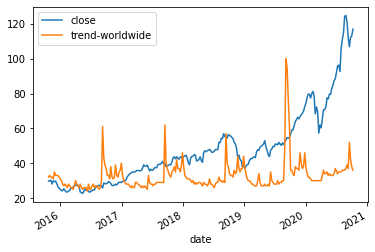

In [26]:
# Use hvplot to visualize the time series data in the df_apple DataFrame
df_concat.plot()

## Building Time Trends

### Step 1: Note that on September 10, 2019, Apple organized an event where it presented the new iPhone 11 family, the Apple Watch Series 5, and a new iPad. This event gained worldwide attention.

### Step 2: Closely examine the data from March 1, 2019 to January 31, 2020.

In [31]:
# Using the df_apple DataFrame, use the loc function to select a
# range of data from March 1st, 2019 to January 31st, 2020
df_spotlight = df_concat.loc["2019-03-01":"2020-01-31"]

# Review the df_spotlight DataFrame
df_spotlight.hvplot()


:NdOverlay   [Variable]
   :Curve   [date]   (value)

### Step 3: Create a plot by using hvPlot, and then identify whether both time series indicate a common trend that might correspond to this narrative.

In [ ]:
# Use hvPlot to visualize the df_spotlight DataFrame
# YOUR CODE HERE


:NdOverlay   [Variable]
   :Curve   [date]   (value)

### Step 4: Before seeking any correlations between these time series, add columns to the `df_apple` DataFrame to analyze the impact of the Google Trends data on the weekly returns and stock volatility, as follows:

1. Use the Pandas `shift` function to add a new column that lags the Google Trends data by one period.

    > **Hint** Google Trends data is reported every week on Sunday, so you have a weekly period in this time series.

2. Use the Pandas `pct_change` function to add a new column that has the weekly price returns.

3. Compute the rolling stock volatility for Apple by using the following Pandas method:

    `df_apple["weekly_volatility"] = df_apple["close"].pct_change().rolling(window=4).std()`


In [ ]:
# Create a column which lags Google trends by one week
# Use the shift function, and move the data down by one row
df_apple["lagged_trends"] = # YOUR CODE HERE


In [ ]:
# Create a column that contains the Apple weekly return data
# Use the pct_change function to calculate the weekly return values
df_apple["weekly_returns"] = # YOUR CODE HERE


In [ ]:
# Create a column of Apple weekly rolling stock volatility 
# Chain the pct_function, the rolling function and a 4 period window, and the std function 
df_apple["weekly_volatility"] = # YOUR CODE HERE


In [ ]:
# Display the df_apple DataFrame to confirm all columns are present
# YOUR CODE HERE


,close,trend-worldwide,lagged_trends,weekly_returns,weekly_volatility
date,,,,,
2015-10-23,29.77,32.0,NaN,NaN,NaN
2015-10-30,29.88,33.0,32.0,0.003695,NaN
2015-11-06,30.27,32.0,33.0,0.013052,NaN
2015-11-13,28.09,32.0,32.0,-0.072019,NaN
2015-11-20,29.83,31.0,32.0,0.061944,0.055367


### Step 5: Use the Pandas `corr` function to compute the correlations among the lagged Google Trends data, the price returns, and the stock volatility. Does any predictable relationship exist?

In [ ]:
# Use the corr function to compute the correlation between the lagged Google Trends data, price returns, and stock volatility
# YOUR CODE HERE


,lagged_trends,weekly_returns,weekly_volatility
lagged_trends,1.000000,0.026701,0.004911
weekly_returns,0.026701,1.000000,0.086676
weekly_volatility,0.004911,0.086676,1.000000
